In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Share/home/chenxupeng/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'isnan']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [27]:
cd /Share/home/chenxupeng/shibinbin/projects/Deepfold2/

/Share/home/shibinbin/projects/Deepfold2


In [28]:
import h5py
predictions = {}
with h5py.File('output/Known/icSHAPE/Spitale_2015_invitro/r=all,w=128,m=fcn1,reg=1', 'r') as f:
    for seqname in f.keys():
        g = f[seqname]
        predictions[seqname] = {}
        for key in g.keys():
            predictions[seqname][key] = g[key][:]

In [29]:
len(predictions)

540

In [30]:
name = {}
for i in range(540):
    name[i] = predictions.keys()[i].split('_')[0]

In [31]:
name

{0: u'tRNA',
 1: u'srp',
 2: u'grp1',
 3: u'tmRNA',
 4: u'RNaseP',
 5: u'tmRNA',
 6: u'srp',
 7: u'grp2',
 8: u'tRNA',
 9: u'16s',
 10: u'srp',
 11: u'tRNA',
 12: u'grp1',
 13: u'RNaseP',
 14: u'RNaseP',
 15: u'grp1',
 16: u'srp',
 17: u'RNaseP',
 18: u'tRNA',
 19: u'tRNA',
 20: u'RNaseP',
 21: u'RNaseP',
 22: u'RNaseP',
 23: u'srp',
 24: u'grp1',
 25: u'tmRNA',
 26: u'tmRNA',
 27: u'tmRNA',
 28: u'srp',
 29: u'tRNA',
 30: u'RNaseP',
 31: u'tRNA',
 32: u'grp1',
 33: u'srp',
 34: u'srp',
 35: u'grp1',
 36: u'grp1',
 37: u'RNaseP',
 38: u'5s',
 39: u'RNaseP',
 40: u'16s',
 41: u'grp1',
 42: u'grp1',
 43: u'16s',
 44: u'16s',
 45: u'RNaseP',
 46: u'tRNA',
 47: u'srp',
 48: u'grp2',
 49: u'RNaseP',
 50: u'grp1',
 51: u'tmRNA',
 52: u'telomerase',
 53: u'srp',
 54: u'grp1',
 55: u'RNaseP',
 56: u'srp',
 57: u'tmRNA',
 58: u'tRNA',
 59: u'RNaseP',
 60: u'RNaseP',
 61: u'tmRNA',
 62: u'srp',
 63: u'srp',
 64: u'5s',
 65: u'grp2',
 66: u'grp1',
 67: u'tRNA',
 68: u'tRNA',
 69: u'tRNA',
 70: u'

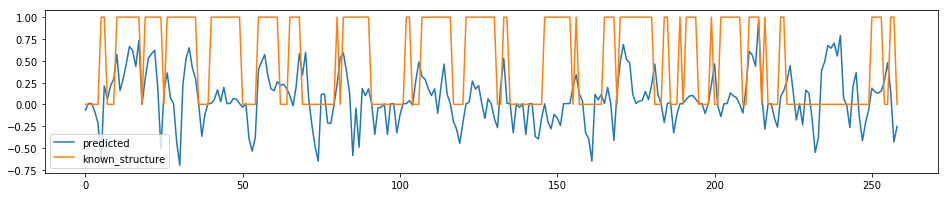

In [32]:
seqname = predictions.keys()[4]
fig, ax = subplots(figsize=(16, 3))
ax.plot(-predictions[seqname]['predicted_values'], label='predicted')
ax.plot(predictions[seqname]['true_labels'], label='known_structure')
ax.legend()

In [101]:
seqname

u'16s_H.sapiens_domain4'

In [33]:
from scipy.stats import pearsonr

In [34]:
pcc = {}
for i in range(540):
    seqname = predictions.keys()[i]
    pre = -predictions[seqname]['predicted_values']
    true = predictions[seqname]['true_labels']
    pcc[i] = pearsonr(pre,true)

In [35]:
pcc

{0: (-0.022086030036677431, 0.85389678335082286),
 1: (0.054774466367258329, 0.59412164451331484),
 2: (0.14487662116171524, 0.00049239166359081404),
 3: (0.307297903843118, 4.1136930336574284e-09),
 4: (0.24815489973907612, 5.3979142291223589e-05),
 5: (0.19488665859117038, 0.0014622475362103386),
 6: (0.018263971800974086, 0.7605027392687923),
 7: (0.038635438301667289, 0.28365617022830569),
 8: (-0.17424053629456232, 0.14324101798560562),
 9: (nan, 1.0),
 10: (0.074178063782823392, 0.52993415514813957),
 11: (0.17803415501614867, 0.15593688230737621),
 12: (0.28972969751706124, 2.3723489856743109e-09),
 13: (0.052832222045768443, 0.25554061599836347),
 14: (0.25336025678895252, 1.0567848116129041e-05),
 15: (0.37242595695325542, 2.6205779296148003e-19),
 16: (0.16642357624969073, 0.0033972516106152038),
 17: (0.10016924106313686, 0.066668108492243194),
 18: (0.024238256179128562, 0.82468779415008231),
 19: (0.25108925180159342, 0.027617421621576939),
 20: (0.37192240054715853, 4.136

In [36]:
pcc_adjust = {}
for i in range(540):
    seqname = predictions.keys()[i]
    pre = np.abs(np.ceil(-predictions[seqname]['predicted_values']))
    true = predictions[seqname]['true_labels']
    pcc_adjust[i] = pearsonr(pre,true)

In [37]:
from math import isnan
clean_dict = {k: pcc_adjust[k][0] for k in pcc_adjust if not isnan(pcc_adjust[k][0])}

In [38]:
pcc_ad = np.array([[value] for (key,value) in clean_dict.iteritems()])

In [39]:
name_ = np.array([[value] for (key,value) in name.iteritems()])

In [40]:
np.unique(name_)

array([u'16s', u'23s', u'5s', u'RNaseP', u'grp1', u'grp2', u'srp', u'tRNA',
       u'telomerase', u'tmRNA'],
      dtype='<U10')

In [41]:
from sklearn.metrics import accuracy_score
acc = {}
for i in range(540):
    seqname = predictions.keys()[i]
    pre = np.abs(np.ceil(-predictions[seqname]['predicted_values']))
    true = predictions[seqname]['true_labels']
    acc[i] = accuracy_score(pre,true)
acc = np.array([[value] for (key,value) in acc.iteritems()])

In [42]:
accu = {}
for nam in np.unique(name_):
    accu[nam] = 0
    count =0
    for i in range(540):
        if name_[i] == nam:
            accu[nam] += acc[i]
            count+=1
    accu[nam] /=float(count)

In [43]:
accu

{u'16s': array([ 0.54610361]),
 u'23s': array([ 0.6480513]),
 u'5s': array([ 0.58823203]),
 u'RNaseP': array([ 0.59285918]),
 u'grp1': array([ 0.56642894]),
 u'grp2': array([ 0.5112496]),
 u'srp': array([ 0.57095736]),
 u'tRNA': array([ 0.54386393]),
 u'telomerase': array([ 0.49613444]),
 u'tmRNA': array([ 0.59321966])}

In [44]:
#set a threshold to select accuracy

In [45]:
predictions[seqname]['predicted_values'].shape

(171,)

In [46]:
list = [i/100.0 for i in np.arange(-100,100)]

In [47]:
from tqdm import tqdm

In [67]:
acc_ = {}
pre = {}
for t in tqdm(range(200)):
    acc = {}
    alpha = list[t]
    for i in range(540):
        seqname = predictions.keys()[i]
        pre[t] = np.ndarray([predictions[seqname]['predicted_values'].shape[0],1])
        for j in range(predictions[seqname]['predicted_values'].shape[0]):
            if -predictions[seqname]['predicted_values'][j] <alpha:
                pre[t][j] = 0
            else:
                pre[t][j] = 1
        true = predictions[seqname]['true_labels']
        acc[i] = accuracy_score(pre[t],true)
    acc_[alpha] = np.array([[value] for (key,value) in acc.iteritems()])

100%|██████████| 200/200 [02:04<00:00,  1.49it/s]


In [65]:
-predictions[seqname]['predicted_values'][j] <0.1

-0.25290835

In [54]:
acc_whole = {}
for t in tqdm(range(200)):
    accu = {}
    sum = 0
    for nam in np.unique(name_):
        accu[nam] = 0
        count =0
        for i in range(540):
            if name_[i] == nam:
                accu[nam] += acc_[list[t]][i]
                count+=1
        accu[nam] /=float(count)
        sum += accu[nam]
    ave = sum/10.0
    accu['average'] = ave
    acc_whole[list[t]] = accu

100%|██████████| 200/200 [00:01<00:00, 125.76it/s]


In [62]:
acc_whole[list[1]]['average'][0]

0.49360783449927548

In [85]:
average = np.ndarray([200,1])
s16 = np.ndarray([200,1])
s23 = np.ndarray([200,1])
s5 = np.ndarray([200,1])
rnp = np.ndarray([200,1])
grp1 = np.ndarray([200,1])
grp2 = np.ndarray([200,1])
srp = np.ndarray([200,1])
trna = np.ndarray([200,1])
tel = np.ndarray([200,1])
tmrna = np.ndarray([200,1])
for i in range(200):
    average[i] = acc_whole[list[i]]['average'][0]
    s16[i] = acc_whole[list[i]]['16s'][0]
    s23[i] = acc_whole[list[i]]['23s'][0]
    s5[i] = acc_whole[list[i]]['5s'][0]
    rnp[i] = acc_whole[list[i]]['RNaseP'][0]
    grp1[i] = acc_whole[list[i]]['grp1'][0]
    grp2[i] = acc_whole[list[i]]['grp2'][0]
    srp[i] = acc_whole[list[i]]['srp'][0]
    trna[i] = acc_whole[list[i]]['tRNA'][0]
    tel[i] = acc_whole[list[i]]['telomerase'][0]
    tmrna[i] = acc_whole[list[i]]['tmRNA'][0]

In [92]:
s16[0]

array([ 0.43787904])

In [73]:
np.argmax(acc_whole[list[i]]['average'])

101

In [98]:
print s16[np.argmax(s16)],np.argmax(s16)
print s23[np.argmax(s23)],np.argmax(s23)
print s5[np.argmax(s5)],np.argmax(s5)
print rnp[np.argmax(rnp)],np.argmax(rnp)
print grp1[np.argmax(grp1)],np.argmax(grp1)
print grp2[np.argmax(grp2)],np.argmax(grp2)
print srp[np.argmax(srp)],np.argmax(srp)
print trna[np.argmax(trna)],np.argmax(trna)
print tel[np.argmax(tel)],np.argmax(tel)
print tmrna[np.argmax(tmrna)],np.argmax(tmrna)

[ 0.57830879] 103
[ 0.67218786] 101
[ 0.5939097] 101
[ 0.6157253] 101
[ 0.58631317] 101
[ 0.64288216] 195
[ 0.57203238] 96
[ 0.5466822] 92
[ 0.56455239] 167
[ 0.59531995] 100


In [89]:
s16[]

TypeError: 'function' object has no attribute '__getitem__'

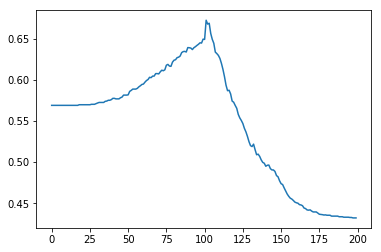

In [88]:
plt.plot(s23)

In [75]:
acc_whole[list[101]]

{u'16s': array([ 0.57609013]),
 u'23s': array([ 0.67218786]),
 u'5s': array([ 0.5939097]),
 u'RNaseP': array([ 0.6157253]),
 'average': array([ 0.58343282]),
 u'grp1': array([ 0.58631317]),
 u'grp2': array([ 0.56278526]),
 u'srp': array([ 0.56791467]),
 u'tRNA': array([ 0.53742798]),
 u'telomerase': array([ 0.53033387]),
 u'tmRNA': array([ 0.5916403])}

In [65]:
sum = 0
for i in range(10):
    if i in clean_dict.keys():
        sum += clean_dict[i]
sum/538.0

0.0017310730345789199

Text(0.5,1,u'accuracy distribution')

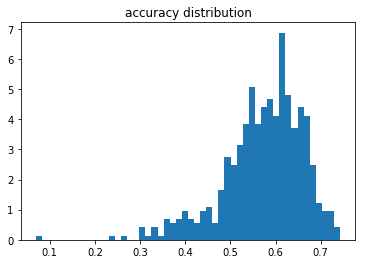

In [55]:
fig, ax = plt.subplots((1), figsize=(6,4))
ax.hist(acc, bins=50, normed=True)
ax.set_title('accuracy distribution')

In [36]:
predictions[seqname].keys()

[u'predicted_labels', u'true_labels', u'predicted_values', u'sequence']

In [37]:
predicted_values = np.concatenate([predictions[seqname]['predicted_values'] for seqname in predictions.keys()])
true_labels = np.concatenate([predictions[seqname]['true_labels'] for seqname in predictions.keys()])

Text(0.5,1,u'predicted values')

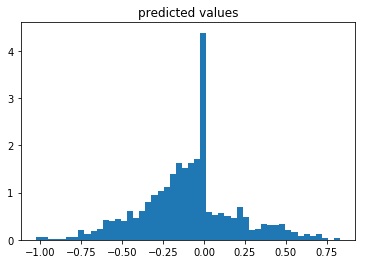

In [54]:
fig, ax = plt.subplots((1), figsize=(6,4))
ax.hist(predicted_values, bins=50, normed=True)
ax.set_title('predicted values')

In [29]:
from scipy.stats import pearsonr
print(pearsonr(-predicted_values, true_labels))

(0.16947936792234319, 0.0)
